<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     15784 non-null  object 
 1   Historic                                   15784 non-null  object 
 2   Classification Key                         15784 non-null  object 
 3   Disaster Group                             15784 non-null  object 
 4   Disaster Subgroup                          15784 non-null  object 
 5   Disaster Type                              15784 non-null  object 
 6   Disaster Subtype                           15784 non-null  object 
 7   External IDs                               2405 non-null   object 
 8   Event Name                                 4955 non-null   object 
 9   ISO                                        15784 non-null  object 
 10  Country               

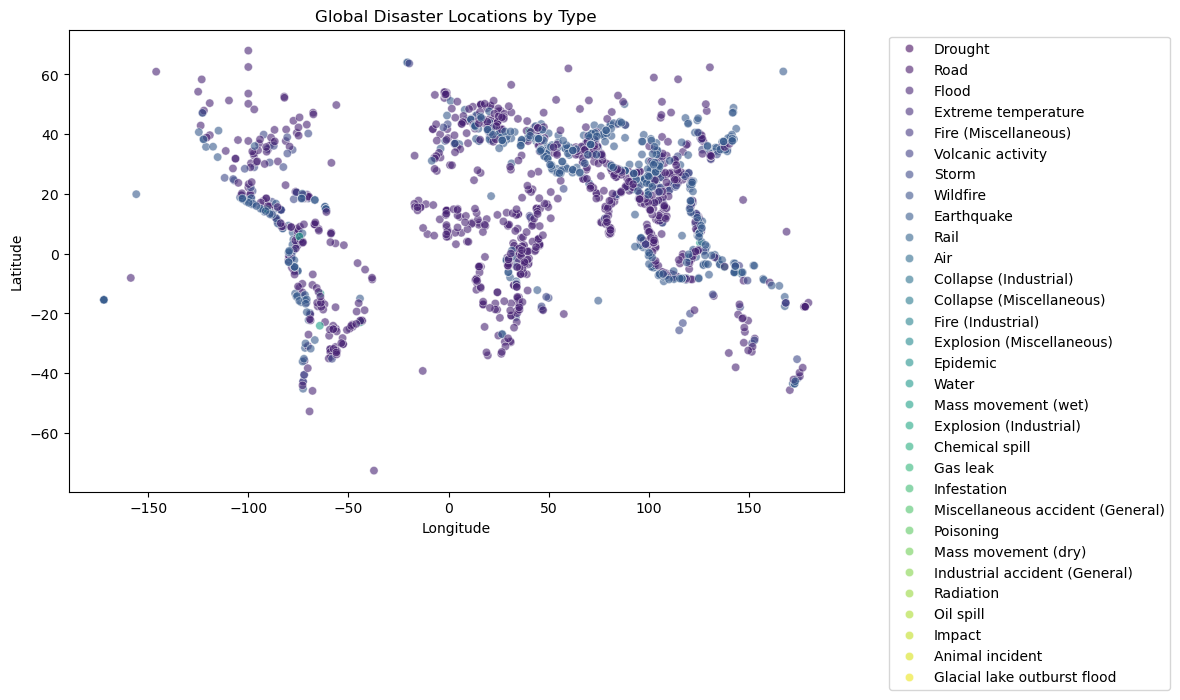

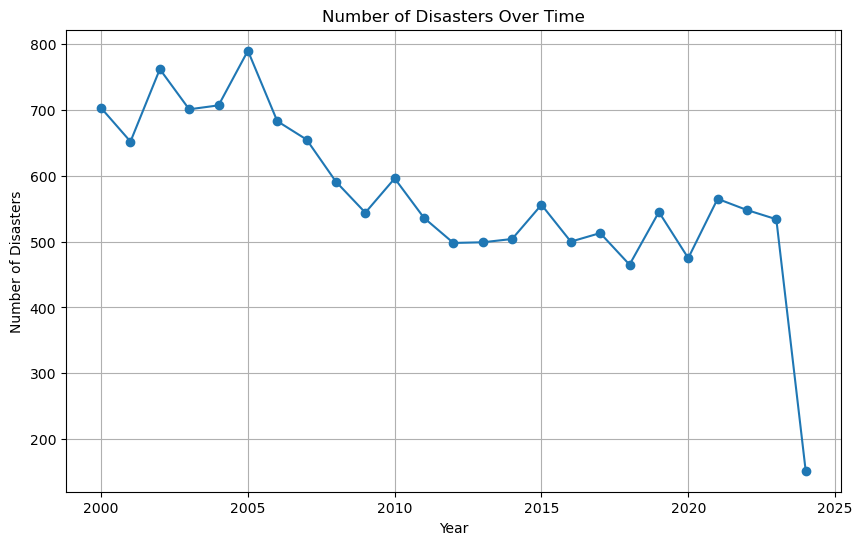

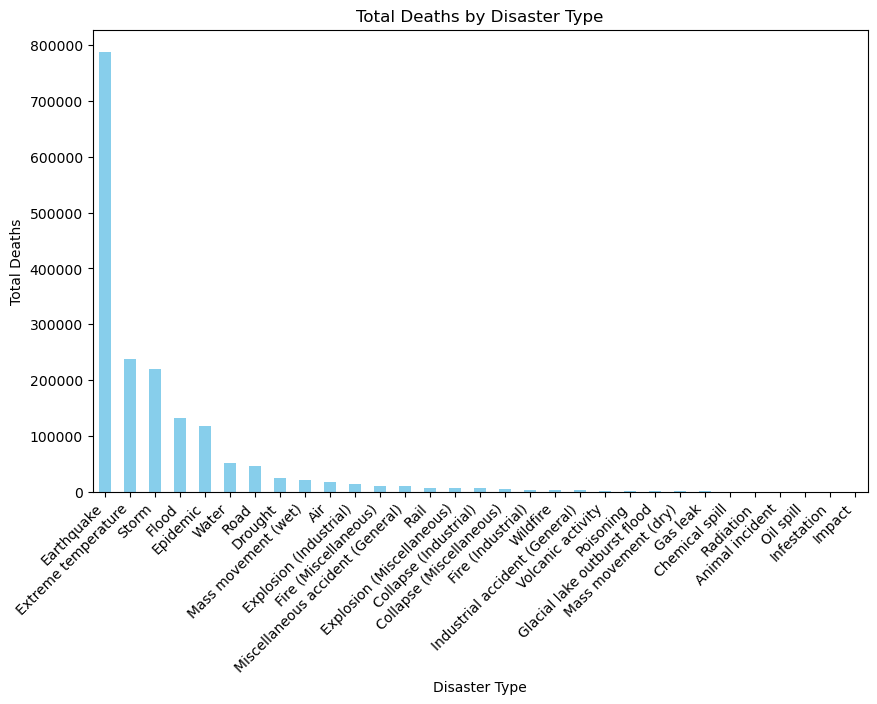

KeyError: 'Column not found: Total Damage (`000 US$)'

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
try:
    df = pd.read_csv('public_emdat_project.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('public_emdat_project.csv', encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv('public_emdat_project.csv', encoding='ISO-8859-1')

# Display basic info
print(df.info())
print(df.head())

# Geospatial Analysis: Plot disaster locations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Disaster Type', palette='viridis', alpha=0.6)
plt.title('Global Disaster Locations by Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Temporal Analysis: Disasters over time
df['Start Date'] = pd.to_datetime(df[['Start Year', 'Start Month', 'Start Day']].dropna().apply(
    lambda row: f"{int(row['Start Year'])}-{int(row['Start Month'])}-{int(row['Start Day'])}", axis=1
))
disasters_over_time = df.groupby(df['Start Date'].dt.year)['DisNo.'].count()
plt.figure(figsize=(10, 6))
disasters_over_time.plot(kind='line', marker='o')
plt.title('Number of Disasters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.grid()
plt.show()

# Impact Analysis: Total deaths by disaster type
total_deaths_by_type = df.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
total_deaths_by_type.plot(kind='bar', color='skyblue')
plt.title('Total Deaths by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.show()

# Impact Analysis: Total damage by country
total_damage_by_country = df.groupby('Country')['Total Damage (`000 US$)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
total_damage_by_country.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Total Damage (in thousands of US$)')
plt.xlabel('Country')
plt.ylabel('Total Damage (in thousands of US$)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Correlation Analysis: Heatmap of numerical variables
numerical_columns = ['Total Deaths', 'No. Injured', 'No. Affected', 'Total Damage (`000 US$)', 'Latitude', 'Longitude']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()